In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.89771448]
 [3.11007609]]


In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.89771448]
 [10.11786665]]


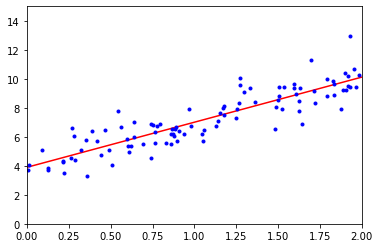

In [6]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

비용함수를 최소화하는 Θ(모델)값을 찾는 방법으로 경사하강법과 정규방정식이 있음
정규방정식은 역행렬을 이용해서 값을 구하는 방법이다.
고정된 계산 시간이 장점이지만 feature가 많은 경우 계산량이 많아져 상당히 느려진다. 또한 행렬의 역행렬이 항상 존재한다는 보장이 없는 단점이 있다.
^Θ = (X^TX)^-1X^Ty

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.89771448] [[3.11007609]]
[[ 3.89771448]
 [10.11786665]]


In [8]:
theta_best_svg, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svg

array([[3.89771448],
       [3.11007609]])

In [9]:
np.linalg.pinv(X_b).dot(y)


array([[3.89771448],
       [3.11007609]])

경사하강법은 파라미터값을 점진적으로 조정하면서 비용 함수를 최적화 시키는 방법이다.
기울기가 높은 방향을 선택하고 해당 방향으로 진행해서 기울기가 0이 되는 곳을 찾는 방법이다.
다만 비용함수에 따라 해당 지점이 전역 최솟값이라 보장할 순 없다.
mse는 기울기가 급격히 변하지 않고 최소점도 한 곳이기 때문에 전역 최솟값에 접근할 수 있는 비용 함수이다.

데이터의 스케일에 따라 비용함수의 모양도 변하게 된다.
두 특징의 스케일이 균일하면 mse 함수도 원형을 그리지만 한 쪽의 분포가 크게 높다면 타원형이 되어 전역 최솟값에 도달하기 어려워진다.

경사하강법을 적용하기 위해서는 